<a href="https://colab.research.google.com/github/BYT18/Clustering-Animation/blob/main/Animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries 
from matplotlib import rc
rc('animation', html='jshtml')

from math import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation

In [ ]:
#Kmeans clustering algorithim 

#Determine the centroid to which each point is nearest
def assignPointsToCentroids(centroids, points): #centroids is array of K x N shape (K = number of clusters and N number of features/Dimensions), points is array of M x N shape (M = number of data points and N = number of features)
    M = points.shape[0] #M is number of data points (# of rows in points array)
    K = centroids.shape[0]  #k is number of clusters (# of rows in centroids array)
    classifications = np.zeros((M,), dtype=np.int)  #create array to store labels for each data point

    #compute distance from centroid
    for i in range(M):
        smallestDistance = 0
        for k in range(K):
            distance = np.linalg.norm(points[i,:] - centroids[k,:]) #compute distance between point and centroid
            #assign point to nearest centrois 
            if k == 0:
                smallestDistance = distance
                classifications[i] = k  #label point i in array of all data points to centroid k
            elif distance < smallestDistance:
                smallestDistance = distance 
                classifications[i] = k  #label point i in array of all data points to centroid k
    return classifications

#Recalculate centroid locations for each cluster
def recalcCentroids(centroids, points, classifications):
    K = centroids.shape[0]  #K is number of centroids (# of rows in centroids array)
    N = points.shape[1] #N is number of features (# of columns in points array)
    M = points.shape[0] #M is number of data points (# of rows in points array)

    newCentroids = np.zeros((K, N)) #matrix for new centroid locations
    for k in range(K):
        if sum(classifications == k) > 0:
            newCentroids[k,:] = (np.sum(points[classifications == k,:], axis=0) / sum(classifications == k)) #compute average distance of each point from its centroid
        else:
            newCentroids[k,:] = centroids[k,:]  #centroid doesnt change if it has no points
    return newCentroids
    

class KMeansND:
    '''KMeansND(initialCentroids, points)
    PARAMETERS:
    initialCentroids: K x N array of K initial centroids with N
        features/coordinates.
    points: M x N array of M points with N features/coordinates.
    METHODS:
    (centroids, classifications, iterations) = getCentroids()
        Perform K-means clustering. Return a tuple containing the
        array of centroid coordinates, an M x 1 array of point
        classifications, and number of iterations required.
    getGenerator()
        Return a generator function to step through K-means iterations.
        Each call of the generator returns the current centroids,
        classifications, and iteration, beginning with the initial
        centroids and classifications.
    '''
    def __init__(self, initialCentroids, points):
        if initialCentroids.shape[1] != points.shape[1]: #make sure # of columns of points = centroids
            raise RuntimeError('Dimension mismatch. Centroids and data points'
                + ' must be described by the same number of features.')
        else:
            self.initialCentroids = initialCentroids
            self.points = points

    #execute kmeans algoithim until convergence 
    def getCentroids(self):
        centroids = np.copy(self.initialCentroids)
        # Initialize lastCentroids to arbitrary value different from centroids
        # to ensure loop executes at least once.
        lastCentroids = centroids + 1
        iteration = 0
        while not np.array_equal(centroids, lastCentroids):
            lastCentroids = np.copy(centroids)  #get cetroid locations from previous iteration
            classifications = assignPointsToCentroids(centroids, self.points) #label points
            centroids = recalcCentroids(centroids, self.points, classifications)  #move centroids
            iteration += 1
        return (centroids, classifications, iteration)

    #get various stages of clustering and centroid movement 
    #very similar to getCentroids()
    def _generatorFunc(self):
        centroids = np.copy(self.initialCentroids)
        lastCentroids = centroids + 1
        iteration = 0
        initialIteration = True
        while not np.array_equal(centroids, lastCentroids):
            if initialIteration:  #capture initial state of system on first iteration
                classifications = assignPointsToCentroids(centroids, self.points)
                initialIteration = False
            else:
                lastCentroids = np.copy(centroids)
                classifications = assignPointsToCentroids(centroids, self.points)
                centroids = recalcCentroids(centroids, self.points, classifications)
                iteration += 1
            yield (centroids, classifications, iteration) #stops the generatorFunc after each iteration and returns all variables. Function remains in frozen state until called again where it will continue execution and pause again.

    def getGeneratorFunc(self):
        return self._generatorFunc

Enter Desired Number of Clusters: 5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


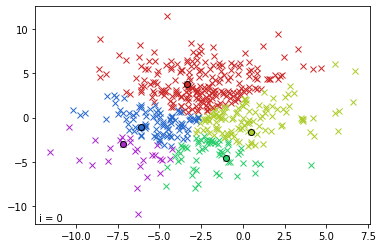

In [ ]:
#import libraries 
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import colorsys
import sys
from datetime import datetime

userInput = input("Enter Desired Number of Clusters: " )
K = int(userInput)   # Number of clusters (centroids) to compute
numClusters = int(userInput)     # Number of clusters to generate
ptsPerCluster = 100    # Number of points to cluster
varianceCoeff = 1    # This controls the spread of clustered points

xCenterBounds = (-4, 4) #set bounds of the centers for the randomly generated clusters of data points
yCenterBounds = (-4, 4)

covariance = np.array([[varianceCoeff * (xCenterBounds[1] - xCenterBounds[0]), 0],
                       [0, varianceCoeff * (yCenterBounds[1] - yCenterBounds[0])]])

#initialize data points
def generateClusters():
    centers = np.random.random_sample((numClusters, 2)) #generates center of clusters that are constrained by set bounds
    centers[:,0] = (
        centers[:,0] * (xCenterBounds[1] - xCenterBounds[0]) + xCenterBounds[0])
    centers[:,1] = (
        centers[:,1] * (yCenterBounds[1] - yCenterBounds[0]) + yCenterBounds[0])

    points = np.zeros((numClusters * ptsPerCluster, 2))
    for i in range(numClusters):
        points[i*ptsPerCluster : (i+1)*ptsPerCluster,:] = (
            np.random.multivariate_normal(centers[i,:], covariance, ptsPerCluster)) #distribute desired number of data points around each center 
    return points

#Randomly select K points as the initial centroid locations
def initializeCentroids(K, points):
    M = points.shape[0] # number of points
    indices = []
    while len(indices) < K:
        index = np.random.randint(0, M) #choose random point 
        if not index in indices:
            indices.append(index)
    initialCentroids = points[indices,:]
    return initialCentroids

#draw each frame of animation 
def animate(clusterInfo):
    (currentCentroids, classifications, iteration) = clusterInfo
    for k in range(K):
        updatedClusterData = points[classifications == k,:]
        clusterObjList[k].set_data(updatedClusterData[:,0], updatedClusterData[:,1])  #draws clusters
        centroidObjList[k].set_data(currentCentroids[k,0], currentCentroids[k,1]) #draws centroids
    iterText.set_text('i = {:d}'.format(iteration)) #draws iteration text

# Create figure and axes. Initialize cluster and centroid line objects.
fig, ax = plt.subplots()
clusterObjList = []
centroidObjList = []
for k in range(K):
    clusterColor = tuple(colorsys.hsv_to_rgb(k / K, 0.8, 0.8))  #determine colors for each cluster

    clusterLineObj, = ax.plot([], [], ls='None', marker='x', color=clusterColor)  #set colors and line style of cluster
    clusterObjList.append(clusterLineObj)

    centroidLineObj, = ax.plot([], [], ls='None', marker='o', #set colors and line style of centroid
        markeredgecolor='k', color=clusterColor)
    centroidObjList.append(centroidLineObj)
iterText = ax.annotate('', xy=(0.01, 0.01), xycoords='axes fraction')

#create a pad/limits so animation is better to view
def setAxisLimits(ax, points):
    xSpan = np.amax(points[:,0]) - np.amin(points[:,0])
    ySpan = np.amax(points[:,1]) - np.amin(points[:,1])
    pad = 0.05    #provides white space at edges of plot window so data pointes dont cover edges of plot or text
    ax.set_xlim(np.amin(points[:,0]) - pad * xSpan,
        np.amax(points[:,0]) + pad * xSpan)
    ax.set_ylim(np.amin(points[:,1]) - pad * ySpan,
        np.amax(points[:,1]) + pad * ySpan)

# Initialize data and K-means clustering. Show and animate plot.
points = generateClusters()
initialCentroids = initializeCentroids(K, points)
genFunc = KMeansND(initialCentroids, points).getGeneratorFunc()
setAxisLimits(ax, points)
animObj = animation.FuncAnimation(fig, animate, frames=genFunc,repeat=True, interval=500)
plt.ion()
plt.show()


In [ ]:
#create animation
animObj

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


In [ ]:
'''
# Construct interactive terminal interface.
inputMessage = ('\nMake a selection:\n'
    + '(1) Randomize clusters and centroids\n'
    + '(2) Randomize centroids only\n'
    + '(3) Save animation to mp4\n'
    + '(4) Exit\n')
while 1:
    if sys.version_info[0] < 3:
        selection = raw_input(inputMessage)
    else:
        selection = input(inputMessage)
    
    if selection == '1':
        animObj._stop()
        print('\nRandomizing clusters and centroids...')
        points = generateClusters()
        initialCentroids = initializeCentroids(K, points)
        genFunc = KMeansND(initialCentroids, points).getGeneratorFunc()
        setAxisLimits(ax, points)
        animObj = animation.FuncAnimation(fig, animate, frames=genFunc,
            repeat=True, interval=500)
    elif selection == '2':
        animObj._stop()
        print('\nRandomizing centroids...')
        initialCentroids = initializeCentroids(K, points)
        genFunc = KMeansND(initialCentroids, points).getGeneratorFunc()
        animObj = animation.FuncAnimation(fig, animate, frames=genFunc,
            repeat=True, interval=500)
        fig.canvas.draw()
    elif selection == '3':
        time = datetime.now()
        timeStr = (str(time.year) + str(time.month) + str(time.day)
            + str(time.hour) + str(time.minute) + str(time.second))
        ffmpegWriterClass = animation.writers['ffmpeg']
        ffmpegWriterObj = ffmpegWriterClass(fps=1, extra_args=['-vcodec', 'h264'])
        filename = timeStr + '_KMeans2D.mp4'
        print('\nSaving file ./' + filename)
        animObj.save(filename, writer=ffmpegWriterObj)
    elif selection == '4':
        exit()
        break
    else:
        print('\nInvalid selection.\n')
'''

"\n# Construct interactive terminal interface.\ninputMessage = ('\nMake a selection:\n'\n    + '(1) Randomize clusters and centroids\n'\n    + '(2) Randomize centroids only\n'\n    + '(3) Save animation to mp4\n'\n    + '(4) Exit\n')\nwhile 1:\n    if sys.version_info[0] < 3:\n        selection = raw_input(inputMessage)\n    else:\n        selection = input(inputMessage)\n    \n    if selection == '1':\n        animObj._stop()\n        print('\nRandomizing clusters and centroids...')\n        points = generateClusters()\n        initialCentroids = initializeCentroids(K, points)\n        genFunc = KMeansND(initialCentroids, points).getGeneratorFunc()\n        setAxisLimits(ax, points)\n        animObj = animation.FuncAnimation(fig, animate, frames=genFunc,\n            repeat=True, interval=500)\n    elif selection == '2':\n        animObj._stop()\n        print('\nRandomizing centroids...')\n        initialCentroids = initializeCentroids(K, points)\n        genFunc = KMeansND(initialCe